In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist




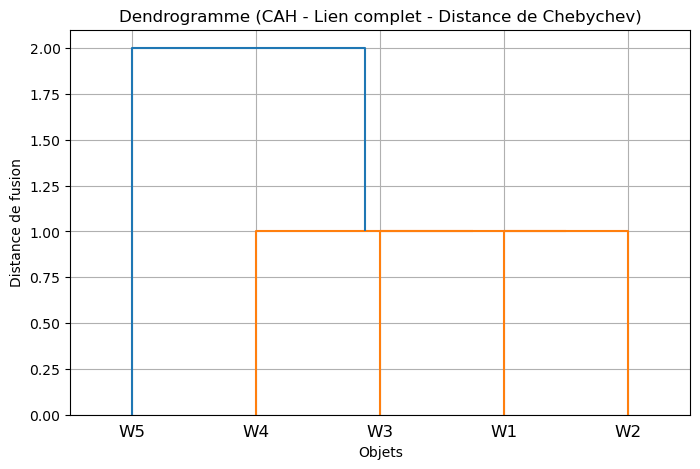

In [2]:
# Données corrigées
X = np.array([
    [1, 0, 1, 0],  # W1
    [2, 0, 1, 0],  # W2
    [1, 1, 0, 1],  # W3
    [1, 0, 0, 1],  # W4
    [2, 1, 2, 0]   # W5
])

# Calcul des distances avec Chebychev (minkowski p=inf)
Z = linkage(X, method='complete', metric='chebyshev')

# Affichage du dendrogramme
plt.figure(figsize=(8, 5))
dendrogram(Z, labels=["W1", "W2", "W3", "W4", "W5"])
plt.title("Dendrogramme (CAH - Lien complet - Distance de Chebychev)")
plt.xlabel("Objets")
plt.ylabel("Distance de fusion")
plt.grid(True)
plt.show()

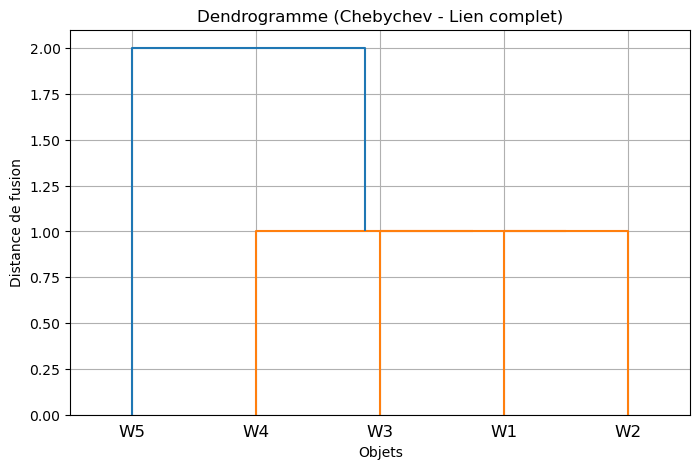

W1 → Classe 1
W2 → Classe 1
W3 → Classe 1
W4 → Classe 1
W5 → Classe 2


In [3]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Données corrigées
X = np.array([
    [1, 0, 1, 0],  # W1
    [2, 0, 0, 1],  # W2
    [1, 1, 0, 0],  # W3
    [1, 0, 0, 1],  # W4
    [2, 1, 2, 0]   # W5
])

# Lien complet + distance Chebychev
Z = linkage(X, method='complete', metric='chebyshev')

# Dendrogramme
plt.figure(figsize=(8, 5))
dendrogram(Z, labels=["W1", "W2", "W3", "W4", "W5"])
plt.title("Dendrogramme (Chebychev - Lien complet)")
plt.xlabel("Objets")
plt.ylabel("Distance de fusion")
plt.grid(True)
plt.show()

# Découpage en 3 classes
classes = fcluster(Z, t=3, criterion='maxclust')

# Affichage des classes
for i, c in enumerate(classes):
    print(f"W{i+1} → Classe {c}")


In [6]:
# Affichage de la trace de fusion
print("🔁 TRACE DE L'ALGORITHME CAH :")
n = X.shape[0]  # nombre d'objets de départ

for i, (a, b, dist, count) in enumerate(Z):
    a = int(a)
    b = int(b)
    
    def nommer(idx):
        if idx < n:
            return f"W{idx+1}"
        else:
            return f"Cluster{idx+1}"
    
    print(f"Étape {i+1} : fusion de {nommer(a)} et {nommer(b)} → distance = {dist:.2f} → nouveaux éléments : {int(count)}")


🔁 TRACE DE L'ALGORITHME CAH :
Étape 1 : fusion de W1 et W2 → distance = 1.00 → nouveaux éléments : 2
Étape 2 : fusion de W3 et Cluster6 → distance = 1.00 → nouveaux éléments : 3
Étape 3 : fusion de W4 et Cluster7 → distance = 1.00 → nouveaux éléments : 4
Étape 4 : fusion de W5 et Cluster8 → distance = 2.00 → nouveaux éléments : 5


c:\Users\hermanhk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Étiquettes (classe) de chaque point : [0 0 0 0 1]
Centroïdes : [[1.25 0.25 0.75 0.  ]
 [4.   1.   2.   0.  ]]


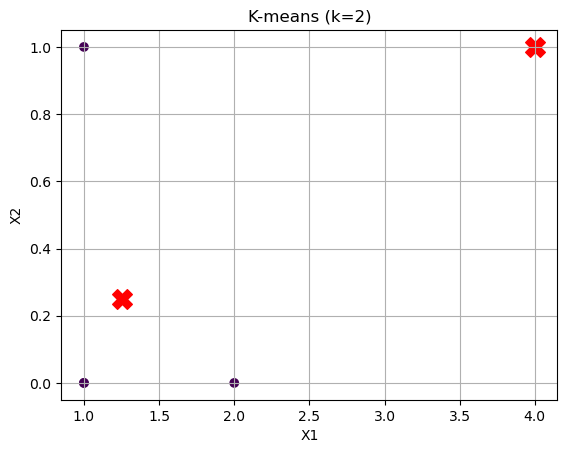

In [7]:
#K-means
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Générer des données fictives
X = np.array([
    [1, 0, 1, 0],  # W1
    [2, 0, 1, 0],  # W2
    [1, 1, 1, 0],  # W3
    [1, 0, 0, 0],  # W4
    [4, 1, 2, 0]   # W5
])

# Appliquer KMeans avec k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Afficher les étiquettes de cluster
print("Étiquettes (classe) de chaque point :", kmeans.labels_)

# Afficher les centres
print("Centroïdes :", kmeans.cluster_centers_)

# Affichage graphique
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200)
plt.title("K-means (k=2)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()
